# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("/content/creditcard.csv", on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.info()

In [28]:
data = data.dropna()

In [29]:
# data.V13.astype(float)
data.loc[data.V13=='-0.0611627627078775.90479989626219', "V13"] = -0.061162762707877590479989626219
data.V13 = data.V13.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284802 entries, 0 to 284803
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284802 non-null  float64
 1   V1      284802 non-null  float64
 2   V2      284802 non-null  float64
 3   V3      284802 non-null  float64
 4   V4      284802 non-null  float64
 5   V5      284802 non-null  float64
 6   V6      284802 non-null  float64
 7   V7      284802 non-null  float64
 8   V8      284802 non-null  float64
 9   V9      284802 non-null  float64
 10  V10     284802 non-null  float64
 11  V11     284802 non-null  float64
 12  V12     284802 non-null  float64
 13  V13     284802 non-null  float64
 14  V14     284802 non-null  float64
 15  V15     284802 non-null  float64
 16  V16     284802 non-null  float64
 17  V17     284802 non-null  float64
 18  V18     284802 non-null  float64
 19  V19     284802 non-null  float64
 20  V20     284802 non-null  float64
 21  V21     28

In [38]:
data.Class.unique()

array([0., 1.])

In [39]:
X = data.drop(["Class"], axis=1)
y = data.Class

In [40]:
y.value_counts()

0.0    284310
1.0       492
Name: Class, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [44]:
y_pred_const = np.zeros(len(X_test))
y_pred_proba_const = y_pred_const

In [52]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [57]:
for metric in [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]:
  print(str(metric))
  print("const: ", metric(y_test, y_pred_const))
  print("knn: ", metric(y_test, y_pred_knn))
  print("log_reg: ", metric(y_test, y_pred_log_reg))
  print()

<function accuracy_score at 0x7f50c3f82a70>
const:  0.9983848598163656
knn:  0.9984375274310493
log_reg:  0.9991397622934991

<function precision_score at 0x7f50c3f87200>
const:  0.0
knn:  1.0
log_reg:  0.8771929824561403

<function recall_score at 0x7f50c3f87290>
const:  0.0
knn:  0.03260869565217391
log_reg:  0.5434782608695652

<function f1_score at 0x7f50c3f82e60>


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


const:  0.0
knn:  0.06315789473684211
log_reg:  0.6711409395973155

<function roc_auc_score at 0x7f50c3f7a320>
const:  0.5
knn:  0.5163043478260869
log_reg:  0.7716775854805896



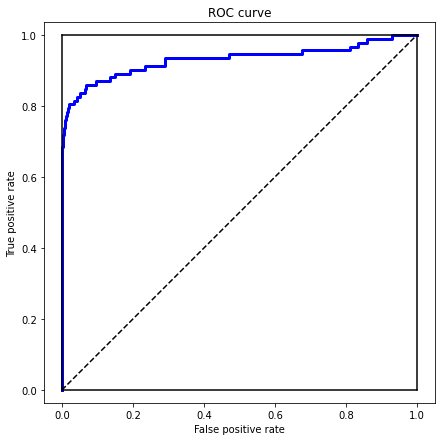

In [72]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Лучше забанить честного, чем пропустить мошенника, поэтому максимизируем recall

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

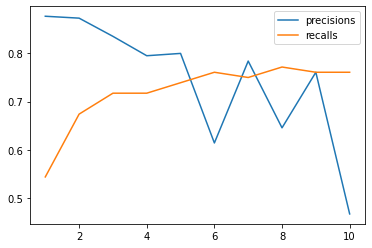

In [73]:
precisions = []
recalls = []

weights = range(1, 11)
for i in weights:
  log_reg_w = LogisticRegression(class_weight={0:1, 1:i}, max_iter=1000)
  log_reg_w.fit(X_train, y_train)
  y_pred = log_reg_w.predict(X_test)
  precisions.append(precision_score(y_test, y_pred))
  recalls.append(recall_score(y_test, y_pred))


plt.plot(weights, precisions)
plt.plot(weights, recalls)
plt.legend(['precisions', 'recalls'])

In [78]:
log_reg_w = LogisticRegression(class_weight={0:1, 1:9}, max_iter=1000)
log_reg_w.fit(X_train, y_train)
y_pred = log_reg_w.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.7608695652173914
0.7608695652173914


In [79]:
from sklearn.linear_model import LogisticRegressionCV

In [85]:
cls = LogisticRegressionCV(cv=5, scoring='recall', max_iter=1000, random_state=1)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.9019607843137255
0.5


In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
log_reg_w = LogisticRegression(class_weight={0:1, 1:9}, max_iter=1000)
log_reg_w.fit(X_train_scaled, y_train)
y_pred = log_reg_w.predict(X_test_scaled)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8333333333333334
0.7608695652173914


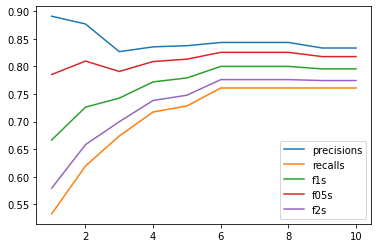

In [89]:
from sklearn.metrics import fbeta_score
precisions = []
recalls = []
f1s = []
f05s = []
f2s = []

weights = range(1, 11)
for i in weights:
  log_reg_w = LogisticRegression(class_weight={0:1, 1:i}, max_iter=1000)
  log_reg_w.fit(X_train_scaled, y_train)
  y_pred = log_reg_w.predict(X_test_scaled)
  precisions.append(precision_score(y_test, y_pred))
  recalls.append(recall_score(y_test, y_pred))
  f05s.append(fbeta_score(y_test, y_pred, beta=0.5))
  f2s.append(fbeta_score(y_test, y_pred, beta=2))
  f1s.append(fbeta_score(y_test, y_pred, beta=1))

plt.plot(weights, precisions)
plt.plot(weights, recalls)
plt.plot(weights, f1s)
plt.plot(weights, f05s)
plt.plot(weights, f2s)
plt.legend(['precisions', 'recalls', 'f1s', 'f05s', 'f2s'])

Максимальный recall ~0.76

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?